In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mplsoccer import Pitch
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Set up the football pitch
pitch_length = 100
pitch_width = 100

In [3]:
# Player IDs for the New Zealand team
nzl_player_ids = {
    'Anna Leat': 1022544,
    'Mackenzie Barry': 1159576,
    'Rebekah Stott': 242293,
    'Katie Bowen': 131809,
    'Catherine Bott': 796544,
    'Katie Kitching': 1413638,
    'Malia Steinmetz': 1096340,
    'Kate Taylor': 1166202,
    'Indiah-Paige Riley': 1009447,
    'Jacqui Hand': 1154468,
    'Annalie Longo': 29139,
    'Grace Jale': 1159570,
    'Ally Green': 1015298,
    'Michaela Foster': 1431832,
    'Gabi Rennie': 1130450
}

# Player IDs for the Colombia team
col_player_ids = {
    'Katherine Tapia': 1167931,
    'Manuela Vanegas': 1017961,
    'Jorelyn Carabalí': 1099653,
    'Daniela Arias': 1005507,
    'Carolina Arias': 796885,
    'Linda Caicedo': 1005527,
    'Ilana Izquierdo': 1005518,
    'Marcela Restrepo': 1416333,
    'Manuela Pavi': 1005510,
    'Catalina Usme': 155047,
    'Leicy Santos': 796887,
    'Daniela Montoya': 121060,
    'Daniela Caracas': 1005508,
    'Liana Salazar': 121333,    
    'Yirleidys Quejada': 1867469
}

In [4]:
# Function to fetch heatmap data
def fetch_heatmap_data(player_id):
    url = f'https://www.sofascore.com/api/v1/event/12178885/player/{player_id}/heatmap'
    response = requests.get(url)
    data = response.json()
    if 'heatmap' in data and isinstance(data['heatmap'], list):
        x_coords = [point['x'] for point in data['heatmap']]
        y_coords = [point['y'] for point in data['heatmap']]
        return x_coords, y_coords
    else:
        return [], []

In [5]:
# Function to plot a player's heatmap
def plot_heatmap(ax, x_coords, y_coords, title):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')

C:\Users\theod\AppData\Local\Temp\ipykernel_16888\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_16888\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_16888\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_16888\3158559870.py:12: FutureWarning: 



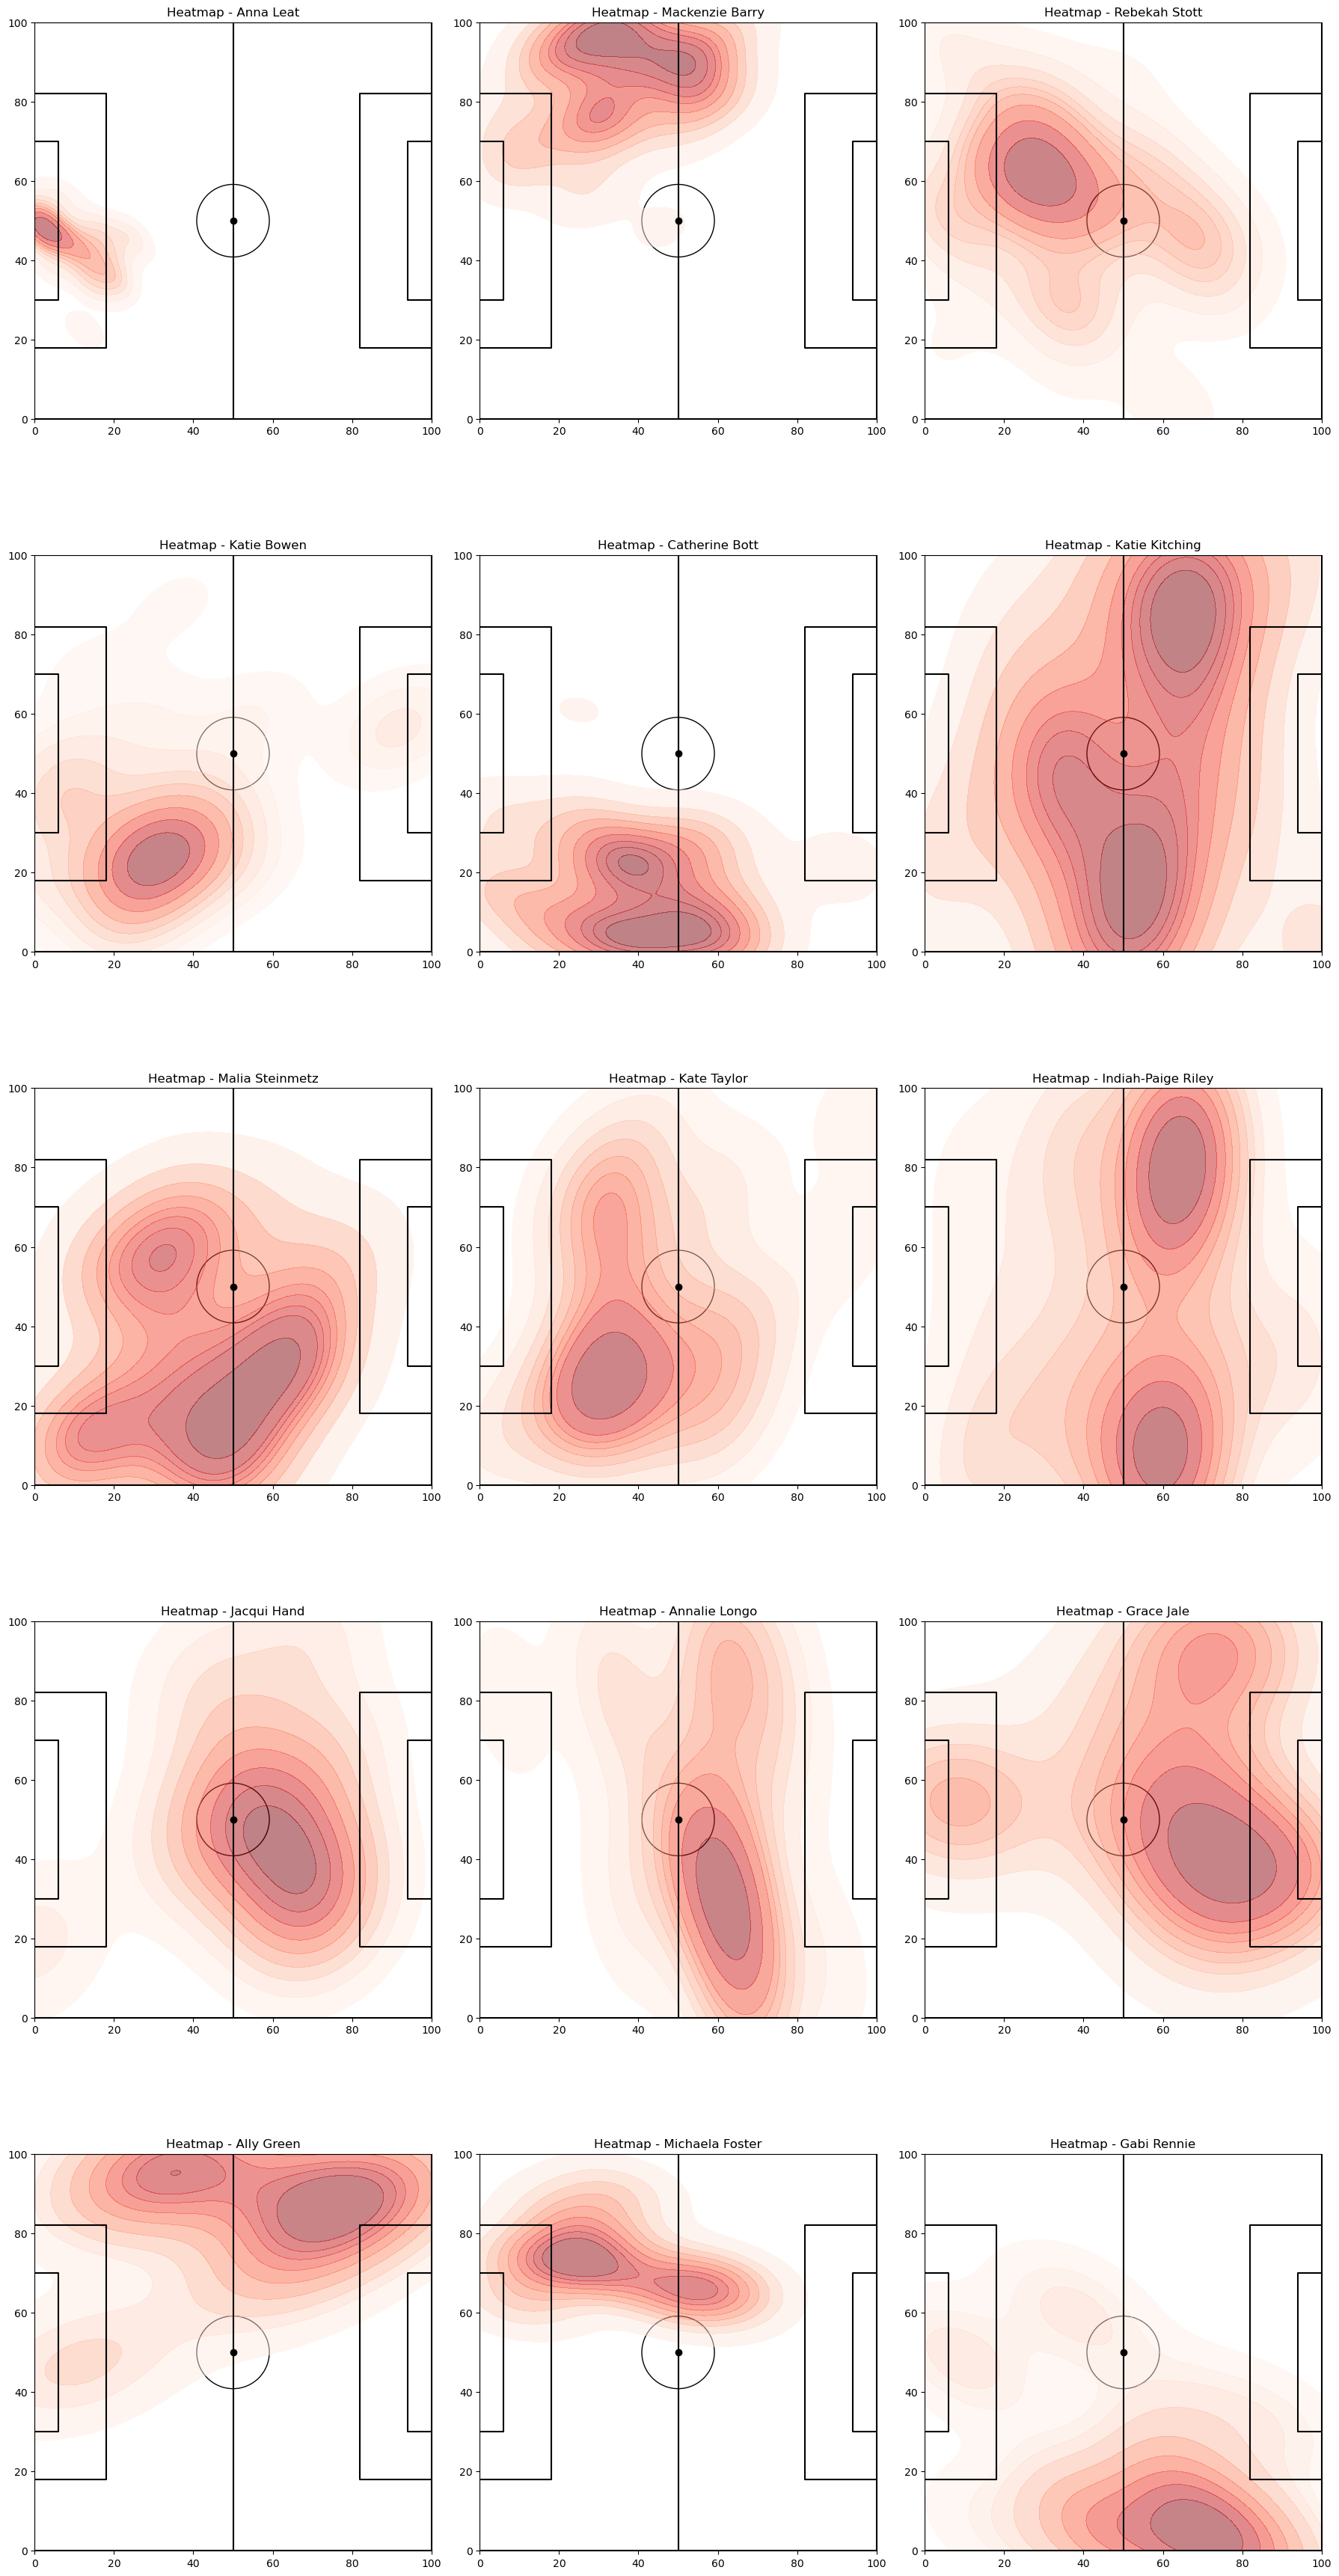

In [6]:
# Create subplots for individual heatmaps
fig, axes = plt.subplots(5, 3, figsize=(18, 36))

# Collect all coordinates for combined heatmap
all_x_coords = []
all_y_coords = []

# Plot each player's heatmap
for ax, (player_name, player_id) in zip(axes.flat, nzl_player_ids.items()):
    x_coords, y_coords = fetch_heatmap_data(player_id)
    plot_heatmap(ax, x_coords, y_coords, f"Heatmap - {player_name}")
    all_x_coords.extend(x_coords)
    all_y_coords.extend(y_coords)

# Remove any extra subplots (if any)
for i in range(len(nzl_player_ids), len(axes.flat)):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

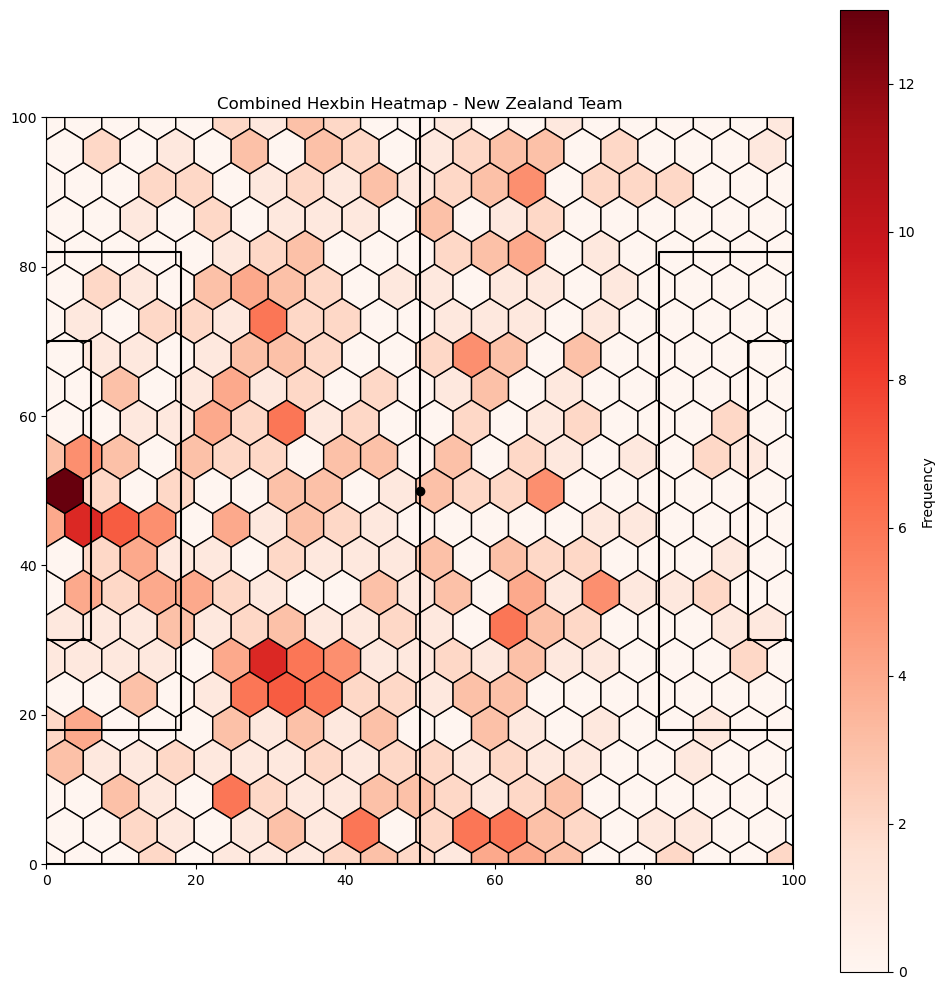

In [7]:
# Create a combined heatmap with hexbin
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot a combined heatmap with hexbin
def plot_combined_hexbin(ax, x_coords, y_coords):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    hb = ax.hexbin(x_coords, y_coords, gridsize=20, cmap='Reds', edgecolors='black')
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Frequency')
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title("Combined Hexbin Heatmap - New Zealand Team")
    ax.set_aspect('equal', adjustable='box')

plot_combined_hexbin(ax, all_x_coords, all_y_coords)

plt.tight_layout()
plt.show()

C:\Users\theod\AppData\Local\Temp\ipykernel_16888\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_16888\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_16888\3158559870.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x_coords, y=y_coords, shade=True, alpha=0.5, cmap='Reds', ax=ax)
C:\Users\theod\AppData\Local\Temp\ipykernel_16888\3158559870.py:12: FutureWarning: 



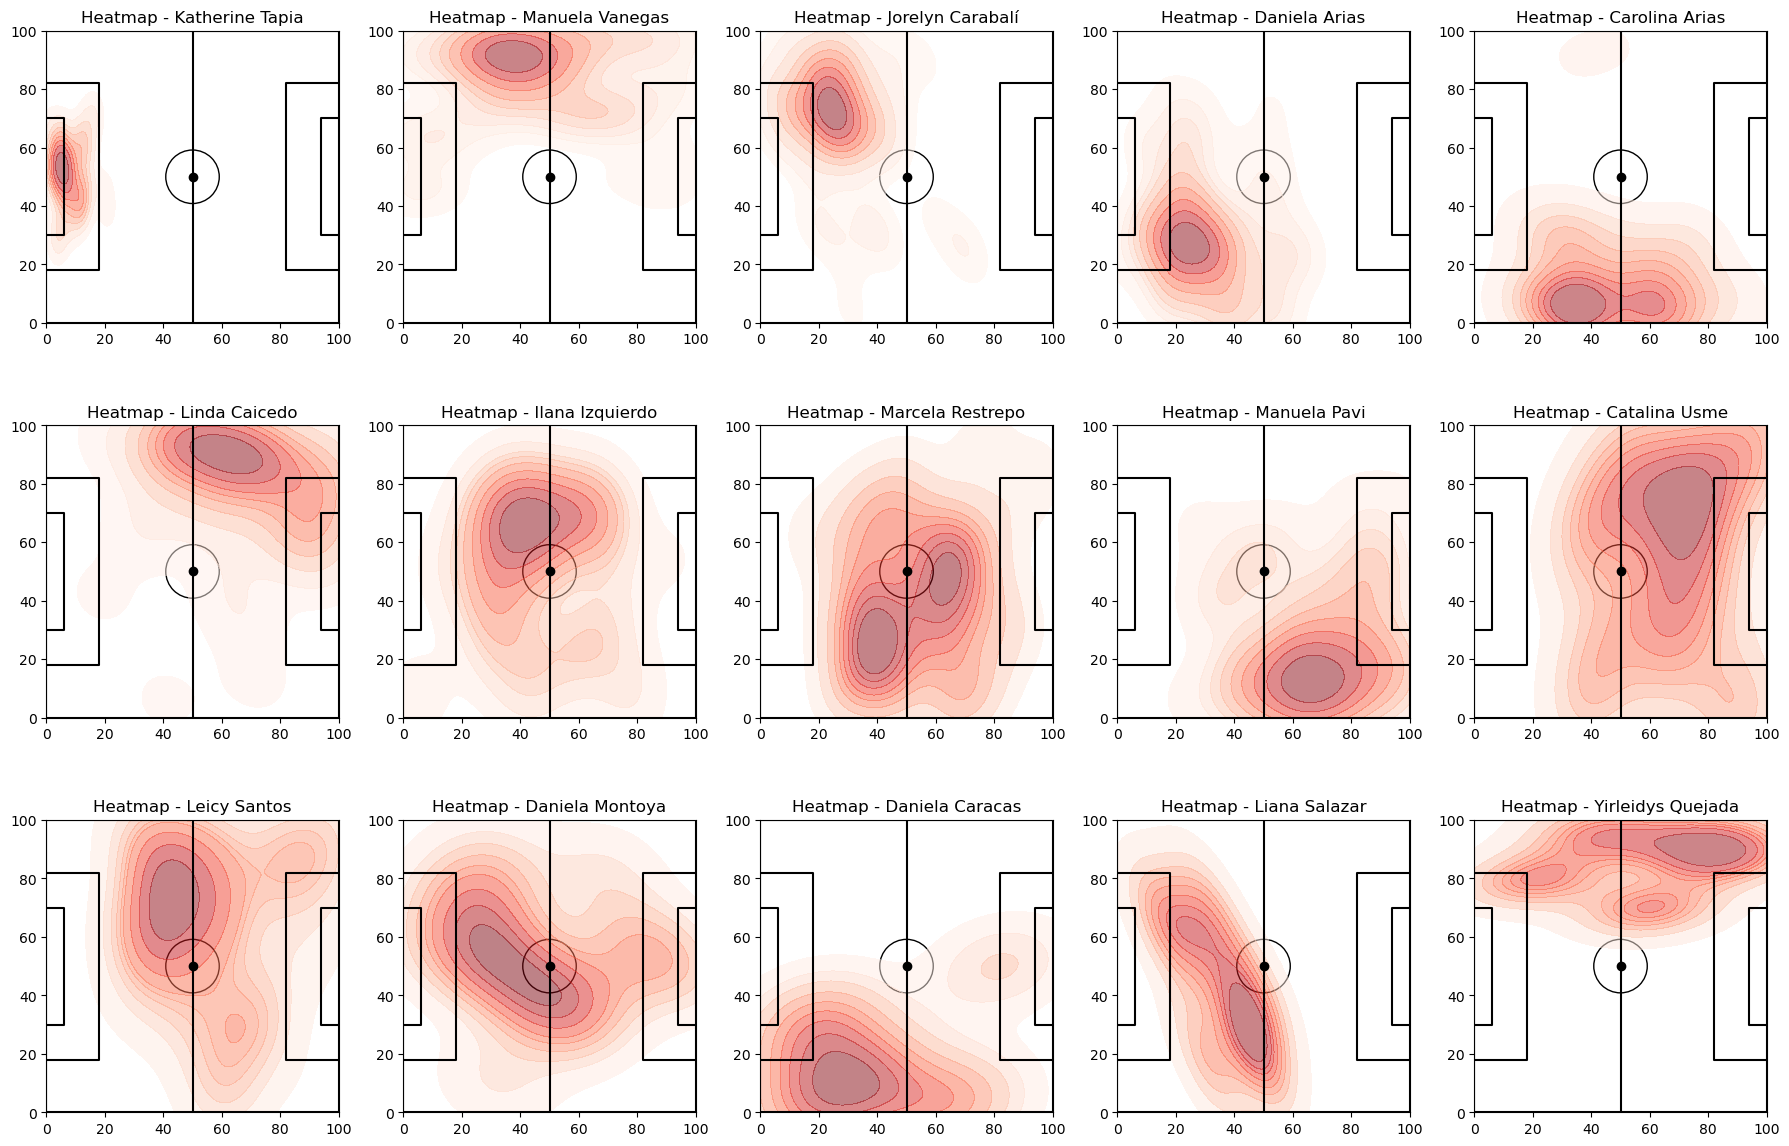

In [8]:
# Create subplots for individual heatmaps
fig, axes = plt.subplots(3, 5, figsize=(18, 12))

# Collect all coordinates for combined heatmap
all_x_coords = []
all_y_coords = []

# Plot each player's heatmap
for ax, (player_name, player_id) in zip(axes.flat, col_player_ids.items()):
    x_coords, y_coords = fetch_heatmap_data(player_id)
    plot_heatmap(ax, x_coords, y_coords, f"Heatmap - {player_name}")
    all_x_coords.extend(x_coords)
    all_y_coords.extend(y_coords)

# Hide any extra subplots (not needed in this case since we have exactly 13 players)
if len(col_player_ids) < len(axes.flat):
    for ax in axes.flat[len(col_player_ids):]:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


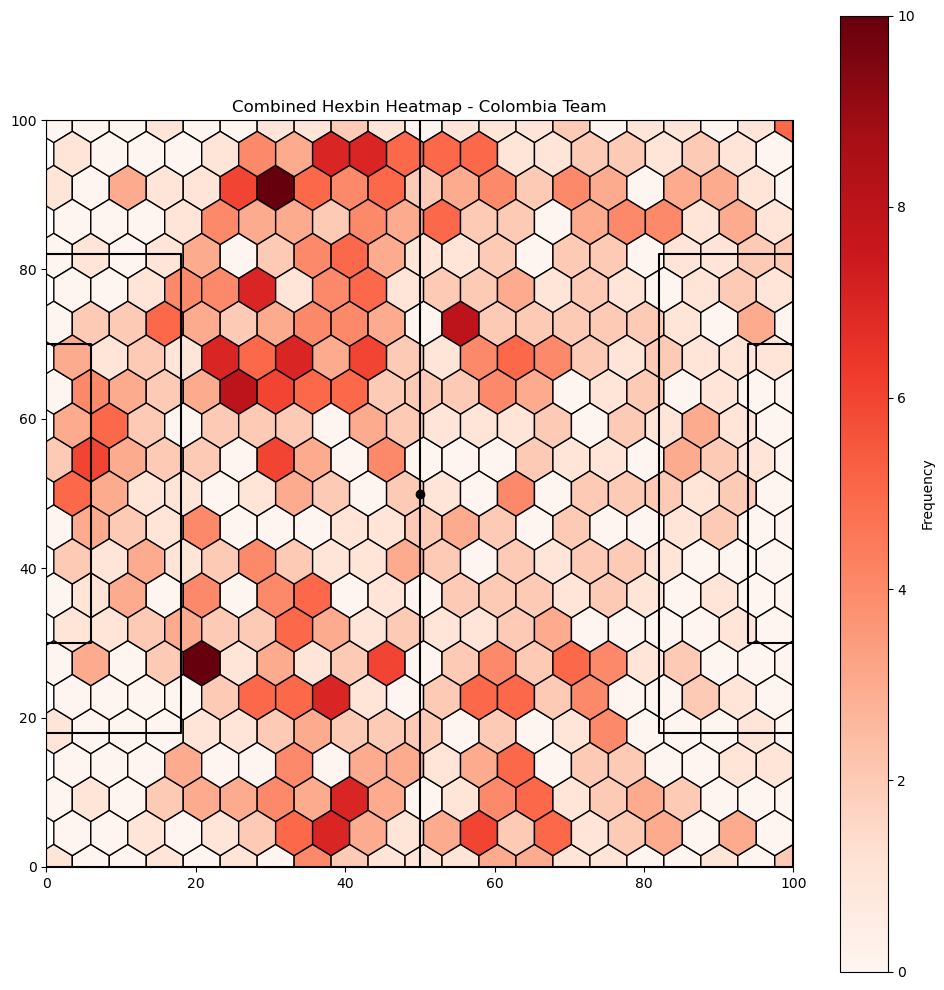

In [9]:
# Create a combined heatmap with hexbin
fig, ax = plt.subplots(figsize=(10, 10))

# Function to plot a combined heatmap with hexbin
def plot_combined_hexbin(ax, x_coords, y_coords):
    ax.plot([0, 0, pitch_length, pitch_length, 0], [0, pitch_width, pitch_width, 0, 0], color="black")
    ax.plot([0, 6, 6, 0], [30, 30, 70, 70], color="black")
    ax.plot([100, 94, 94, 100], [30, 30, 70, 70], color="black")
    ax.plot([0, 18, 18, 0], [18, 18, 82, 82], color="black")
    ax.plot([100, 82, 82, 100], [18, 18, 82, 82], color="black")
    ax.plot([50, 50], [0, 100], color="black")
    ax.plot([50], [50], marker='o', color='black')
    circle = plt.Circle((50, 50), 9.15, color="black", fill=False)
    ax.add_patch(circle)
    hb = ax.hexbin(x_coords, y_coords, gridsize=20, cmap='Reds', edgecolors='black')
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Frequency')
    ax.set_xlim(0, pitch_length)
    ax.set_ylim(0, pitch_width)
    ax.set_title("Combined Hexbin Heatmap - Colombia Team")
    ax.set_aspect('equal', adjustable='box')

plot_combined_hexbin(ax, all_x_coords, all_y_coords)

plt.tight_layout()
plt.show()

In [10]:
# Function to fetch player statistics
def fetch_player_statistics(player_id):
    url = f'https://api.sofascore.com/api/v1/event/12178885/player/{player_id}/statistics'
    response = requests.get(url)
    data = response.json()
    return data['statistics']

In [11]:
# Combine player IDs
all_player_ids = {**nzl_player_ids, **col_player_ids}

# Fetch and compile statistics for all players
data = []
for player_name, player_id in all_player_ids.items():
    try:
        stats = fetch_player_statistics(player_id)
        stats['Player'] = player_name
        stats['Player_ID'] = player_id
        data.append(stats)
    except KeyError:
        print(f"Statistics not available for player: {player_name}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Reorder columns to place 'Player' and 'Player_ID' first
cols = ['Player', 'Player_ID'] + [col for col in df.columns if col not in ['Player', 'Player_ID']]
df = df[cols]

# Save to Excel
output_path = 'C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_nzl_col_round1.xlsx'
df.to_excel(output_path, index=False)

print(f"Data successfully saved to {output_path}")


Data successfully saved to C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_nzl_col_round1.xlsx


In [12]:
# URL to fetch match statistics
url = 'https://www.sofascore.com/api/v1/event/12178885/statistics'

# Fetch the data
response = requests.get(url)
data = response.json()

# Process the data to map home to New Zealand and away to Colombia
team_data = []

for team in data['statistics']:
    for group in team.get('groups', []):
        group_name = group.get('groupName', 'General')
        for stat in group.get('statisticsItems', []):
            team_data.append({
                'Team': 'New Zealand',
                'Group': group_name,
                'Category': stat.get('name', 'Unknown'),
                'Value': stat.get('homeValue', 0)
            })
            team_data.append({
                'Team': 'Colombia',
                'Group': group_name,
                'Category': stat.get('name', 'Unknown'),
                'Value': stat.get('awayValue', 0)
            })

# Convert the processed data into a DataFrame
df = pd.DataFrame(team_data)

# Pivot the DataFrame for comparison
comparison_df = df.pivot_table(index=['Group', 'Category'], columns='Team', values='Value', aggfunc='first').reset_index()

# Save the comparison DataFrame to Excel
comparison_df.to_excel('C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_nzl_col_round1.xlsx', index=False)

# Print the comparison DataFrame to inspect it
print(comparison_df)

Team           Group                 Category  Colombia  New Zealand
0             Attack       Big chances missed         1            0
1             Attack       Big chances scored         1            0
2             Attack    Fouled in final third         3            0
3             Attack  Touches in penalty area        29            9
4          Defending               Clearances        11           22
5          Defending            Interceptions         9            8
6          Defending               Recoveries        59           55
7          Defending              Tackles won        13           17
8          Defending            Total tackles        21           27
9              Duels             Aerial duels        11            9
10             Duels             Dispossessed        14           12
11             Duels                 Dribbles        10            7
12             Duels                    Duels        51           49
13             Duels             G

NameError: name 'color_bra' is not defined

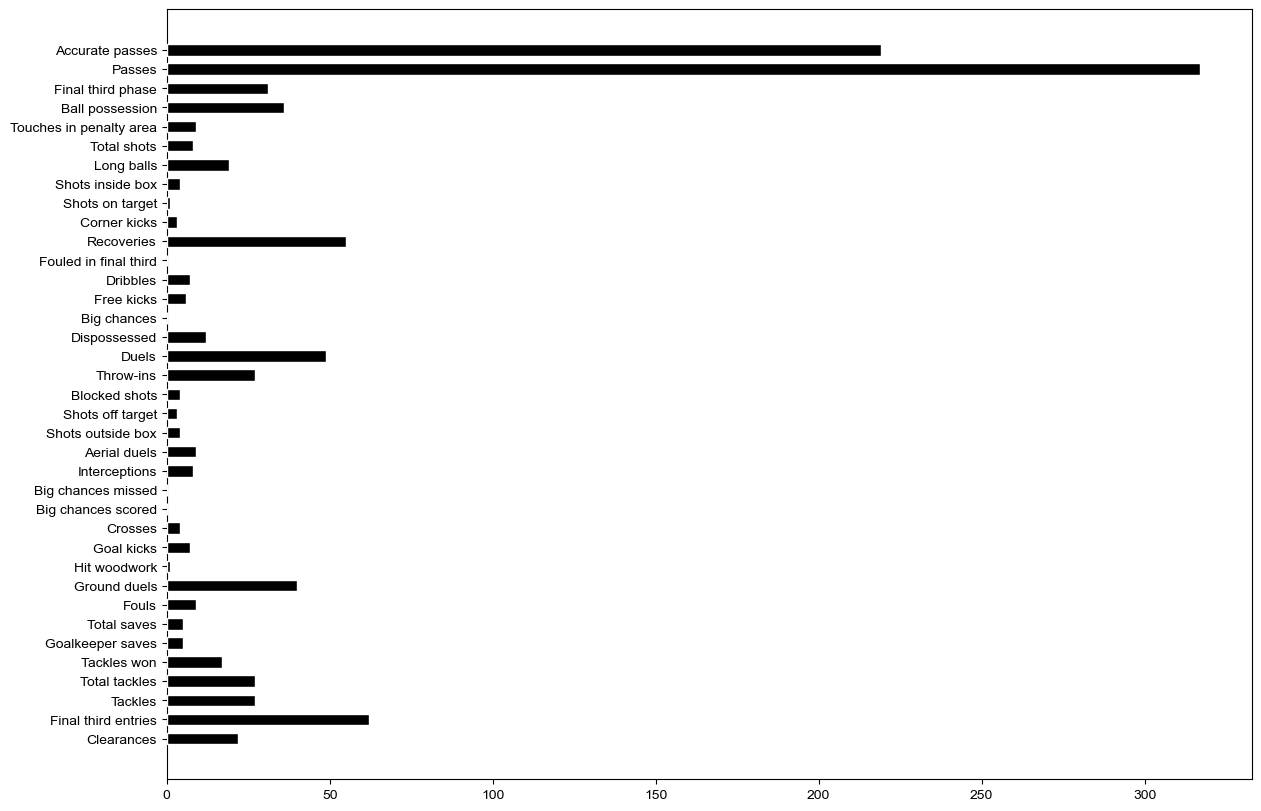

In [13]:
# Load the data from the Excel file
file_path = 'C:/Users/theod/Desktop/SPORTS ANALYTICS/olumpic games/player_stats_nzl_col_round1.xlsx'
df = pd.read_excel(file_path)

# Prepare the data for the butterfly chart
df['Difference'] = df['New Zealand'] - df['Colombia']
df = df.sort_values('Difference', ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 10))

# Use Seaborn style for a modern look
sns.set(style='whitegrid')

# Define professional colors
color_nzl = '#000000'  # Black
color_col = '#FFFF00'  # Yellow

# Plot New Zealand statistics
ax.barh(df['Category'], df['New Zealand'], color=color_nzl, edgecolor='w', label='New Zealand', height=0.6, zorder=3)

# Plot Colombia statistics (negative values for left side)
ax.barh(df['Category'], -df['Colombia'], color=color_bra, edgecolor='w', label='Colombia', height=0.6, zorder=3)

# Add vertical grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.7, which='both', zorder=0)

# Adding labels and title with modern font styles
ax.set_xlabel('Statistics', fontsize=14, fontweight='bold')
ax.set_title('Butterfly Chart: New Zealand vs Colombia Match Statistics', fontsize=16, fontweight='bold')
ax.legend(title='Teams', title_fontsize='13', fontsize='11')

# Adjust x-axis limits for better visual separation
ax.set_xlim([-df['Colombia'].max() - 10, df['New Zealand'].max() + 10])

# Remove the spines for a cleaner look
sns.despine()

# Display the plot with tight layout
plt.tight_layout()
plt.show()


In [ ]:
# Function to fetch player statistics by ID
def fetch_player_statistics(player_id):
    url = f'https://api.sofascore.com/api/v1/event/12178885/player/{player_id}/statistics'
    response = requests.get(url)
    data = response.json()
    return data['statistics'].get('rating', 'N/A')

In [ ]:
# Collect player statistics
player_stats = []

# Process statistics for New Zealand players
for player, player_id in nzl_player_ids.items():
    rating = fetch_player_statistics(player_id)
    player_stats.append({
        'Player': player,
        'Team': 'New Zealand',
        'Rating': rating
    })

# Process statistics for Colombia players
for player, player_id in col_player_ids.items():
    rating = fetch_player_statistics(player_id)
    player_stats.append({
        'Player': player,
        'Team': 'Colombia',
        'Rating': rating
    })


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(player_stats)

# Sort the DataFrame by rating
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.sort_values(by='Rating', ascending=False)


In [ ]:
# Prepare data for heatmap
pivot_table = df.pivot('Player', 'Team', 'Rating')

# Define a custom color map: green for high values, red for low values
colors = ["black", "yellow", "green"]  # Low to High
n_bins = 100  # Number of bins
cmap_name = 'black_yellow_green'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap=cm, cbar=True,
                 linewidths=0.5, linecolor='black', square=True, 
                 annot_kws={"size": 12, 'weight': 'bold'})

# Customizing the plot
ax.set_title('Player Ratings: New Zealand vs Colombia', fontsize=16, fontweight='bold')
ax.set_xlabel('Team', fontsize=14, fontweight='bold')
ax.set_ylabel('Player', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# URL of the API to get the data
url = "https://www.sofascore.com/api/v1/event/12178885/shotmap"

# Make a GET request to get the data
response = requests.get(url)
data = response.json()

# Process data to convert it to DataFrame
shots = data['shotmap']

# Create a list with the shot data
data_list = []

for shot in shots:
    data_list.append({
        'Player Name': shot['player']['name'],
        'Shot Type': shot['shotType'],
        'Situation': shot['situation'],
        'Body Part': shot['bodyPart'],
        'Goal Mouth Location': shot['goalMouthLocation'],
        'X Coordinate': shot['playerCoordinates']['x'],
        'Y Coordinate': shot['playerCoordinates']['y'],
        'Goal (1) / Miss (0)': 1 if shot['shotType'] == 'goal' else 0,
        'Team': 'Home' if shot['isHome'] else 'Away'
    })

# Create DataFrame from the data list
df = pd.DataFrame(data_list)

# Define team colors for misses
team_colors = {
    'Home': 'yellow',
    'Away': 'red'
}

# Define goal colors for each team
goal_colors = {
    'Home': 'green',
    'Away': 'black'
}

# Assign markers for body parts
body_part_markers = {
    'head': 'o',          # Circle
    'right-foot': '^',    # Triangle up
    'left-foot': 's'      # Square
}

# Plotting the shot map
fig, ax = plt.subplots(figsize=(12, 10))

# Setting up the dimensions of the field
field_dimen = (100, 120)
ax.set_xlim(0, field_dimen[1])
ax.set_ylim(0, field_dimen[0])

# Drawing the field
# Pitch Outline & Centre Line
plt.plot([0, 0], [0, 100], color="black")
plt.plot([0, 120], [100, 100], color="black")
plt.plot([120, 120], [100, 0], color="black")
plt.plot([120, 0], [0, 0], color="black")
plt.plot([60, 60], [0, 100], color="black")

# Left Penalty Area
plt.plot([14, 14], [74, 26], color="black")
plt.plot([0, 14], [74, 74], color="black")
plt.plot([0, 14], [26, 26], color="black")

# Right Penalty Area
plt.plot([120, 106], [74, 74], color="black")
plt.plot([106, 106], [74, 26], color="black")
plt.plot([120, 106], [26, 26], color="black")

# Left 6-yard Box
plt.plot([0, 6], [55, 55], color="black")
plt.plot([6, 6], [55, 45], color="black")
plt.plot([6, 0], [45, 45], color="black")

# Right 6-yard Box
plt.plot([120, 114], [55, 55], color="black")
plt.plot([114, 114], [55, 45], color="black")
plt.plot([114, 120], [45, 45], color="black")

# Plot the shots
for team in df['Team'].unique():
    team_data = df[df['Team'] == team]
    for body_part, marker in body_part_markers.items():
        body_part_data = team_data[team_data['Body Part'] == body_part]
        goals = body_part_data[body_part_data['Goal (1) / Miss (0)'] == 1]
        misses = body_part_data[body_part_data['Goal (1) / Miss (0)'] == 0]
        
        # Plot goals with unique color
        ax.scatter(goals['X Coordinate'], goals['Y Coordinate'], color=goal_colors[team], marker=marker, label=f'{team} Goal ({body_part})', s=100)
        
        # Annotate each goal with the player's name
        for idx, row in goals.iterrows():
            ax.annotate(row['Player Name'], (row['X Coordinate'], row['Y Coordinate']),
                        textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='black')
        
        # Plot misses with team color
        ax.scatter(misses['X Coordinate'], misses['Y Coordinate'], color=team_colors[team], marker=marker, label=f'{team} Miss ({body_part})', s=100, alpha=0.6, edgecolor='black')

# Adding legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# Title
plt.title('Shot Map by Team and Body Part')

# Display
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
